In [1]:
# http://khd2.narod.ru/shau/patents.htm
# http://khd2.narod.ru/shau/at117749.pdf

mag 100.0


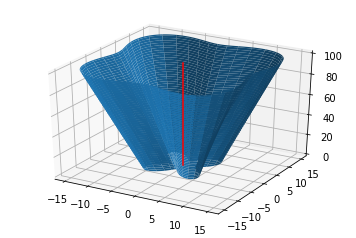

In [6]:
# https://stackoverflow.com/questions/32317247/how-to-draw-a-cylinder-using-matplotlib-along-length-of-point-x1-y1-and-x2-y2

import numpy as np
from stl import mesh
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.array([0, 0, 0])
#axis and radius
#p0 = np.array([1, 3, 2])
#p1 = np.array([8, 5, 9])

p0 = np.array([0, 0, 0])
p1 = np.array([0, 0, 100])

R0 = 20/2
R1 = 42/2
dR = R1-R0
dr = 5/2

#vector in direction of axis
v = p1 - p0
#find magnitude of vector
mag = norm(v)
print("mag", mag)
#unit vector in direction of axis
v = v / mag
#make some vector not in the same direction as v
not_v = np.array([1, 0, 0])
if (v == not_v).all():
    not_v = np.array([0, 1, 0])
#make vector perpendicular to v
n1 = np.cross(v, not_v)
#normalize n1
n1 /= norm(n1)
#make unit vector perpendicular to v and n1
n2 = np.cross(v, n1)
#surface ranges over t from 0 to length of axis and 0 to 2*pi
N_t = 100
N_theta = 360
t_list = np.linspace(0, mag, N_t)
theta_list = np.linspace(0, 2 * np.pi, N_theta)
#use meshgrid to make 2d arrays
t, theta = np.meshgrid(t_list, theta_list)
#generate coordinates for surface

spiral = False
if spiral:
    R_in_0 = R0 * (1+np.sin(theta*2 + t*3)^2)/2 + dR*t/mag - dr
else:
    R_in_0 = R0 * (1+np.sin(theta*2)^2)/2 + dR*t/mag - dr

R_out_0 = R0 + dR*t/mag

X_in, Y_in, Z_in = [p0[i] + v[i] * t + R_in_0 * np.sin(theta) * n1[i] + R_in_0 * np.cos(theta) * n2[i] for i in [0, 1, 2]]
X_out, Y_out, Z_out = [p0[i] + v[i] * t + R_out_0 * np.sin(theta) * n1[i] + R_out_0 * np.cos(theta) * n2[i] for i in [0, 1, 2]]

faces_num = t_list.shape[0] * theta_list.shape[0] * 2 \
          + t_list.shape[0] * theta_list.shape[0] * 2 \
          + theta_list.shape[0] + 2 \
          + theta_list.shape[0] + 2

# Create the mesh
data = mesh.Mesh(np.zeros(faces_num, dtype=mesh.Mesh.dtype))
i_face = 0
def fill_mesh(i_face,X,Y,Z):
    for j in range(X.shape[1] - 1): #along Z
        for i in range(X.shape[0] - 1): # along theta
            #if i == 0 or i == X.shape[0] - 2:
            #    print(i, j)
            data.vectors[i_face][0] = [X[i  ,j  ], Y[i  ,j  ], Z[i  ,j  ]]
            data.vectors[i_face][1] = [X[i+1,j  ], Y[i+1,j  ], Z[i+1,j  ]]
            data.vectors[i_face][2] = [X[i  ,j+1], Y[i  ,j+1], Z[i  ,j+1]]
            #if i == 0 or i == X.shape[0] - 2:
            #    print(data.vectors[i_face])
            i_face = i_face + 1

            data.vectors[i_face][0] = [X[i+1,j+1], Y[i+1,j+1], Z[i+1,j+1]]
            data.vectors[i_face][1] = [X[i+1,j  ], Y[i+1,j  ], Z[i+1,j  ]]
            data.vectors[i_face][2] = [X[i  ,j+1], Y[i  ,j+1], Z[i  ,j+1]]
            #if i == 0 or i == X.shape[0] - 2:
            #    print(data.vectors[i_face])
            i_face = i_face + 1
            
    return i_face
        
        
i_face = fill_mesh(i_face, X_in, Y_in, Z_in)
i_face = fill_mesh(i_face, X_out, Y_out, Z_out)

def fill_top_botom(i_face, X_in, Y_in, Z_in, X_out, Y_out, Z_out, j):
    for i in range(X_in.shape[0] - 1): # along theta
        #print(i, j)

        data.vectors[i_face][0] = [X_in [i  ,j], Y_in [i  ,j], Z_in [i  ,j]]
        data.vectors[i_face][1] = [X_in [i+1,j], Y_in [i+1,j], Z_in [i+1,j]]
        data.vectors[i_face][2] = [X_out[i  ,j], Y_out[i  ,j], Z_out[i  ,j]]
        #print(data.vectors[i_face])
        i_face = i_face + 1

        data.vectors[i_face][0] = [X_in [i+1,j], Y_in [i+1,j], Z_in [i+1,j]]
        data.vectors[i_face][1] = [X_out[i+1,j], Y_out[i+1,j], Z_out[i+1,j]]
        data.vectors[i_face][2] = [X_out[i  ,j], Y_out[i  ,j], Z_out[i  ,j]]
        #print(data.vectors[i_face])
        i_face = i_face + 1
        
    return i_face

i_face = fill_top_botom(i_face, X_in, Y_in, Z_in, X_out, Y_out, Z_out, j = 0)
i_face = fill_top_botom(i_face, X_in, Y_in, Z_in, X_out, Y_out, Z_out, j = X_in.shape[1] - 1)
    
# Write the mesh to file "data.stl"

if spiral:
    data.save('spiral.stl')
else:
    data.save('nonspiral.stl')
    

ax.plot_surface(X_in, Y_in, Z_in)
#ax.plot_surface(X_out, Y_out, Z_out)


#plot axis
ax.plot(*zip(p0, p1), color = 'red')
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)
#ax.set_xlim(-5, 5)
#ax.set_ylim(-5, 5)
#ax.set_zlim(0, 10)
plt.show()

In [7]:
import vtkplotlib as vpl
from stl.mesh import Mesh

if spiral:
    path = 'spiral.stl'
else:
    path = 'nonspiral.stl'

# Read the STL using numpy-stl
mesh = Mesh.from_file(path)

# Plot the mesh
vpl.mesh_plot(mesh)

# Show the figure
vpl.show()